In [1]:
## libraries
sys.path.append("../covid_analysis/")
import importlib
import sys
import os
import numpy as np
import pandas as pd 
import logging

## plotting libraries
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#import plotly.io as pio
#pio.renderers.default = "vscode"

## custom libraries

import covid_utils as cu
importlib.reload(cu)


['D:\\ProgramData\\Anaconda3\\envs\\docker\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\aminm\\AppData\\Roaming\\jupyter\\runtime\\kernel-d62113e6-61de-417e-ad42-b9185b49d4be.json']
['D:\\ProgramData\\Anaconda3\\envs\\docker\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\aminm\\AppData\\Roaming\\jupyter\\runtime\\kernel-d62113e6-61de-417e-ad42-b9185b49d4be.json']


<module 'covid_utils' from '../covid_analysis\\covid_utils.py'>

In [2]:
# Add logging feature to capture daily changes
logging.basicConfig(filename="covid_compile.log",
                    format='%(asctime)s %(message)s',
                    filemode='a', level=logging.DEBUG)

# Creating an object
logger = logging.getLogger()

In [3]:
## files and directories
dir_input = '../COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
file_pattern = '*.csv'

file_census_county = '../data/census2010_19/co-est2019-alldata.csv'

## column names to rename
# ref https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

column_rename = {'Country/Region':'Country_Region', 'Province/State':'Province_State', 'Last Update':'Last_Update','Latitude':'Lat' , 'Longitude':'Long_'}

## US states abbreviation
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [4]:
# read daily reports

combine_df = cu.read_daily_reports(dir_input, file_pattern, rename_col=column_rename)
logger.info(f'Dim of combine df: {str(combine_df.shape)}')
print(combine_df.head())
print(combine_df.columns)

list_group = ['Country_Region', 'Province_State','Admin2','Last_Update']
list_display = ['Confirmed', 'Deaths']
country_summ = cu.summarize_by_county(combine_df, list_group, list_display)
print(country_summ.head())

Total daily reports: 74
   Active Admin2 Combined_Key  Confirmed  Country_Region  Deaths  FIPS  \
0     NaN    NaN          NaN        1.0  Mainland China     NaN   NaN   
1     NaN    NaN          NaN       14.0  Mainland China     NaN   NaN   
2     NaN    NaN          NaN        6.0  Mainland China     NaN   NaN   
3     NaN    NaN          NaN        1.0  Mainland China     NaN   NaN   
4     NaN    NaN          NaN        NaN  Mainland China     NaN   NaN   

       Last_Update  Lat  Long_ Province_State  Recovered  
0  1/22/2020 17:00  NaN    NaN          Anhui        NaN  
1  1/22/2020 17:00  NaN    NaN        Beijing        NaN  
2  1/22/2020 17:00  NaN    NaN      Chongqing        NaN  
3  1/22/2020 17:00  NaN    NaN         Fujian        NaN  
4  1/22/2020 17:00  NaN    NaN          Gansu        NaN  
Index(['Active', 'Admin2', 'Combined_Key', 'Confirmed', 'Country_Region',
       'Deaths', 'FIPS', 'Last_Update', 'Lat', 'Long_', 'Province_State',
       'Recovered'],
      dt

In [5]:
## Make update date column
combine_df['Last_Update_date'] = [str(d).split(' ')[0] for d in combine_df['Last_Update']]
combine_df.head()


,Active,Admin2,Combined_Key,Confirmed,Country_Region,Deaths,FIPS,Last_Update,Lat,Long_,Province_State,Recovered,Last_Update_date
0,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,1/22/2020 17:00,NaN,NaN,Anhui,NaN,1/22/2020
1,NaN,NaN,NaN,14.0,Mainland China,NaN,NaN,1/22/2020 17:00,NaN,NaN,Beijing,NaN,1/22/2020
2,NaN,NaN,NaN,6.0,Mainland China,NaN,NaN,1/22/2020 17:00,NaN,NaN,Chongqing,NaN,1/22/2020
3,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,1/22/2020 17:00,NaN,NaN,Fujian,NaN,1/22/2020
4,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,1/22/2020 17:00,NaN,NaN,Gansu,NaN,1/22/2020


In [6]:
select_col = ['Country_Region',  'Province_State','Admin2','Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Last_Update_date']
combine_subset = combine_df[select_col]

## rename states by abbreviations
combine_subset = combine_subset.replace({'Province_State':us_state_abbrev})

In [7]:
country = 'US'
state = ['California','CA']
state = '|'.join(str(x) for x in state)
print(f'Joint state: {state}')

print(combine_subset[(combine_subset['Country_Region']=='US')]['Province_State'].unique())
print(combine_subset[(combine_subset['Province_State'].str.contains(state, na=False))].shape)
print(combine_subset[(combine_subset['Province_State'].str.contains(state, na=False))])




Joint state: California|CA
['WA' 'Chicago' 'IL' 'CA' 'AZ' 'Chicago, IL' 'Boston, MA'
 'Los Angeles, CA' 'Orange, CA' 'Santa Clara, CA' 'Seattle, WA'
 'Tempe, AZ' 'San Benito, CA' 'Madison, WI' 'San Diego County, CA'
 'San Antonio, TX' 'Ashland, NE' 'Travis, CA' 'Lackland, TX'
 'Humboldt County, CA' 'Sacramento County, CA'
 'Omaha, NE (From Diamond Princess)' 'Travis, CA (From Diamond Princess)'
 'Lackland, TX (From Diamond Princess)'
 'Unassigned Location (From Diamond Princess)' 'Portland, OR'
 'Snohomish County, WA' 'Providence, RI' 'King County, WA'
 'Cook County, IL' 'Grafton County, NH' 'Hillsborough, FL'
 'New York City, NY' 'Placer County, CA' 'San Mateo, CA' 'Sarasota, FL'
 'Sonoma County, CA' 'Umatilla, OR' 'Fulton County, GA'
 'Washington County, OR' ' Norfolk County, MA' 'Berkeley, CA'
 'Maricopa County, AZ' 'Wake County, NC' 'Westchester County, NY'
 'Orange County, CA' 'Contra Costa County, CA' 'Bergen County, NJ'
 'Harris County, TX' 'San Francisco County, CA' 'Clark Coun

In [8]:
combine_CA = combine_subset[(combine_subset['Province_State'].str.contains(state, na=False))]

combine_CA.groupby(['Last_Update_date']).agg([np.sum]).head()

,Country_Region,Province_State,Admin2,Last_Update,Confirmed,Deaths,Recovered
,sum,sum,sum,sum,sum,sum,sum
Last_Update_date,,,,,,,
1/26/20,US,CA,0,1/26/20 16:00,2.0,0.0,0.0
1/27/20,US,CA,0,1/27/20 23:59,2.0,0.0,0.0
1/28/20,US,CA,0,1/28/20 23:00,2.0,0.0,0.0
1/29/20,US,CA,0,1/29/20 19:30,2.0,0.0,0.0
1/30/20,US,CA,0,1/30/20 16:00,2.0,0.0,0.0


### Read US census data by county and format

In [9]:
## read census data for county

census_df = pd.read_csv(file_census_county, encoding = "ISO-8859-1")
print(f'County sensus file shape:{census_df.shape}')
#print(census_df.head())

## replace state names with abbreviations

census_df = census_df.replace({'STNAME':us_state_abbrev})
census_df.head()

County sensus file shape:(3193, 164)


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,40,3,6,1,0,AL,Alabama,4779736,4780125,4785437,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
1,50,3,6,1,1,AL,Autauga County,54571,54597,54773,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
2,50,3,6,1,3,AL,Baldwin County,182265,182265,183112,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
3,50,3,6,1,5,AL,Barbour County,27457,27455,27327,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
4,50,3,6,1,7,AL,Bibb County,22915,22915,22870,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [10]:
## State census subset (COUNTY == 0)

state_census_df = census_df.loc[census_df['COUNTY']==0]

In [11]:
## select census column for popolation estimate by for all counties and states
census_columns = ['STATE','COUNTY','STNAME','CTYNAME','POPESTIMATE2019']

census_select_df = census_df[census_columns]
census_select_df['Province_State'] = [y+', '+x for x,y in zip(census_df['STNAME'],census_df['CTYNAME'])]

census_select_df.head()

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,Province_State
0,1,0,AL,Alabama,4903185,"Alabama, AL"
1,1,1,AL,Autauga County,55869,"Autauga County, AL"
2,1,3,AL,Baldwin County,223234,"Baldwin County, AL"
3,1,5,AL,Barbour County,24686,"Barbour County, AL"
4,1,7,AL,Bibb County,22394,"Bibb County, AL"


#### Merge infection and death rate by the county population
- Date 2020-04-04

In [12]:
select_date = '2020-04-04'
combine_subset_date = combine_subset.loc[combine_subset['Last_Update'].str.contains(select_date, na=False)]
combine_subset_date['county'] = [str(x)+' County' for x in combine_subset_date['Admin2']]

combine_subset_date.head()

,Country_Region,Province_State,Admin2,Last_Update,Confirmed,Deaths,Recovered,Last_Update_date,county
48552,US,SC,Abbeville,2020-04-04 23:34:21,6.0,0.0,0.0,2020-04-04,Abbeville County
48553,US,LA,Acadia,2020-04-04 23:34:21,65.0,2.0,0.0,2020-04-04,Acadia County
48554,US,VA,Accomack,2020-04-04 23:34:21,8.0,0.0,0.0,2020-04-04,Accomack County
48555,US,ID,Ada,2020-04-04 23:34:21,360.0,3.0,0.0,2020-04-04,Ada County
48556,US,IA,Adair,2020-04-04 23:34:21,1.0,0.0,0.0,2020-04-04,Adair County


In [20]:
## merge combine subset for date with county opulation

covid_population_date = pd.merge(combine_subset_date,census_select_df,left_on=['county','Province_State'],right_on=['CTYNAME','STNAME'],how='inner')

##
covid_population_date.head()


,Country_Region,Province_State_x,Admin2,Last_Update,Confirmed,Deaths,Recovered,Last_Update_date,county,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2019,Province_State_y
0,US,SC,Abbeville,2020-04-04 23:34:21,6.0,0.0,0.0,2020-04-04,Abbeville County,45,1,SC,Abbeville County,24527,"Abbeville County, SC"
1,US,VA,Accomack,2020-04-04 23:34:21,8.0,0.0,0.0,2020-04-04,Accomack County,51,1,VA,Accomack County,32316,"Accomack County, VA"
2,US,ID,Ada,2020-04-04 23:34:21,360.0,3.0,0.0,2020-04-04,Ada County,16,1,ID,Ada County,481587,"Ada County, ID"
3,US,IA,Adair,2020-04-04 23:34:21,1.0,0.0,0.0,2020-04-04,Adair County,19,1,IA,Adair County,7152,"Adair County, IA"
4,US,KY,Adair,2020-04-04 23:34:21,3.0,0.0,0.0,2020-04-04,Adair County,21,1,KY,Adair County,19202,"Adair County, KY"


In [22]:
#for x in covid_population_date['Province_State_y']:
    #print(x)
print(f'{covid_population_date.shape}')

for x in covid_population_date['Admin2']:
    print(x)

(2259, 15)
Abbeville
Accomack
Ada
Adair
Adair
Adair
Adair
Adams
Adams
Adams
Adams
Adams
Adams
Adams
Adams
Adams
Adams
Addison
Aiken
Alachua
Alamance
Alameda
Alamosa
Albany
Albany
Albemarle
Alcorn
Alexander
Allamakee
Allegan
Allegany
Allegany
Alleghany
Alleghany
Allegheny
Allen
Allen
Allen
Allendale
Alpine
Amador
Amelia
Amherst
Amite
Anderson
Anderson
Anderson
Anderson
Andrews
Androscoggin
Angelina
Anne Arundel
Anoka
Anson
Antelope
Antrim
Apache
Appanoose
Appling
Arapahoe
Archuleta
Arenac
Arkansas
Arlington
Armstrong
Aroostook
Ashe
Ashland
Ashland
Ashley
Ashtabula
Asotin
Atascosa
Atchison
Atchison
Athens
Atlantic
Atoka
Attala
Audubon
Auglaize
Augusta
Aurora
Austin
Autauga
Baca
Bacon
Baker
Baker
Baldwin
Baldwin
Baltimore
Bamberg
Banks
Bannock
Barbour
Barbour
Barnes
Barnstable
Barnwell
Barren
Barron
Barrow
Barry
Barry
Bartholomew
Barton
Bartow
Bastrop
Bates
Bath
Baxter
Bay
Bay
Bayfield
Beadle
Beaufort
Beaufort
Beaver
Beaverhead
Beckham
Bedford
Bedford
Bedford
Belknap
Bell
Belmont
Beltrami

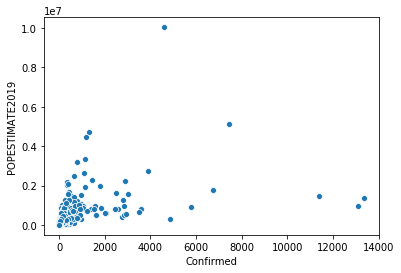

In [14]:
## plot scatter plot for confirmed cases vs population estimate
ax = sns.scatterplot(x="Confirmed", y="POPESTIMATE2019", data=covid_population_date)

In [16]:
## plotly interactive graphs
# ref https://plotly.com/python/ipython-notebook-tutorial/
# ref https://plotly.com/python/getting-started/
# ref https://plotly.com/python/renderers/
df = covid_population_date
fig = px.scatter(df, x="Confirmed", y="POPESTIMATE2019", color="Province_State_x",
                 size='Deaths', hover_data=['Province_State_y'])

fig.show()